In [1]:
import pandas as pd 
import numpy as np 
import csv  
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as datetime
import datetime
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import plot_roc_curve

import geopandas as gpd
from shapely.geometry import Point, Polygon
%matplotlib inline
import descartes

from sklearn.metrics import confusion_matrix, plot_confusion_matrix,\
    precision_score, recall_score, accuracy_score, f1_score, log_loss,\
    roc_curve, roc_auc_score, classification_report

ModuleNotFoundError: No module named 'descartes'

In [2]:
df = pd.read_csv("Data/merged_df.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558254 entries, 0 to 558253
Data columns (total 31 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Unnamed: 0               558254 non-null  int64  
 1   CRASH_RECORD_ID          558254 non-null  object 
 2   CRASH_DATE               558254 non-null  object 
 3   POSTED_SPEED_LIMIT       558254 non-null  int64  
 4   DEVICE_CONDITION         558254 non-null  object 
 5   WEATHER_CONDITION        558254 non-null  object 
 6   LIGHTING_CONDITION       558254 non-null  object 
 7   FIRST_CRASH_TYPE         558254 non-null  object 
 8   ROADWAY_SURFACE_COND     558254 non-null  object 
 9   ROAD_DEFECT              558254 non-null  object 
 10  CRASH_TYPE               558254 non-null  object 
 11  DAMAGE                   558254 non-null  object 
 12  PRIM_CONTRIBUTORY_CAUSE  558254 non-null  object 
 13  SEC_CONTRIBUTORY_CAUSE   558254 non-null  object 
 14  MOST

In [4]:
df['CRASH_DATE'] = df['CRASH_DATE'].map(lambda x: datetime.datetime.strptime(x[0:10], "%Y-%m-%d"))
df['CRASH_DATE']

0        2019-07-10
1        2019-07-10
2        2019-07-10
3        2019-07-10
4        2019-07-10
            ...    
558249   2019-06-19
558250   2019-06-19
558251   2019-06-19
558252   2019-06-19
558253   2019-07-05
Name: CRASH_DATE, Length: 558254, dtype: datetime64[ns]

In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

Unnamed: 0                     0
CRASH_RECORD_ID                0
CRASH_DATE                     0
POSTED_SPEED_LIMIT             0
DEVICE_CONDITION               0
WEATHER_CONDITION              0
LIGHTING_CONDITION             0
FIRST_CRASH_TYPE               0
ROADWAY_SURFACE_COND           0
ROAD_DEFECT                    0
CRASH_TYPE                     0
DAMAGE                         0
PRIM_CONTRIBUTORY_CAUSE        0
SEC_CONTRIBUTORY_CAUSE         0
MOST_SEVERE_INJURY             0
CRASH_HOUR                     0
CRASH_DAY_OF_WEEK              0
CRASH_MONTH                    0
LATITUDE                    4208
LONGITUDE                   4208
PERSON_ID                      0
PERSON_TYPE                    0
SEX                         9431
SAFETY_EQUIPMENT            2207
AIRBAG_DEPLOYED            12308
EJECTION                    8345
VEHICLE_DEFECT             14890
VEHICLE_TYPE               14890
VEHICLE_USE                14890
MANEUVER                   14890
FIRST_CONT

In [7]:
df['MOST_SEVERE_INJURY'] = df['MOST_SEVERE_INJURY'].map({'NO INDICATION OF INJURY': 'mild', 
                                                                         'REPORTED, NOT EVIDENT': 'mild',
                                                                         'NONINCAPACITATING INJURY': 'medium',
                                                                         'INCAPACITATING INJURY': 'severe',
                                                                         'FATAL': 'severe'})
df['MOST_SEVERE_INJURY']

0         mild
1         mild
2         mild
3         mild
4         mild
          ... 
558249    mild
558250    mild
558251    mild
558252    mild
558253    mild
Name: MOST_SEVERE_INJURY, Length: 558254, dtype: object

In [12]:
ls: Data

ls: :: No such file or directory
Data:
1,2,3,4
Traffic_Crashes_-_Crashes.csv
Traffic_Crashes_-_People.csv
Traffic_Crashes_-_Vehicles.csv
geo_export_f6ee29e8-bda0-40d6-9887-d12c071d9bf7.dbf
geo_export_f6ee29e8-bda0-40d6-9887-d12c071d9bf7.prj
geo_export_f6ee29e8-bda0-40d6-9887-d12c071d9bf7.shp
geo_export_f6ee29e8-bda0-40d6-9887-d12c071d9bf7.shx
merged_df.csv
test.cvs


<AxesSubplot:>

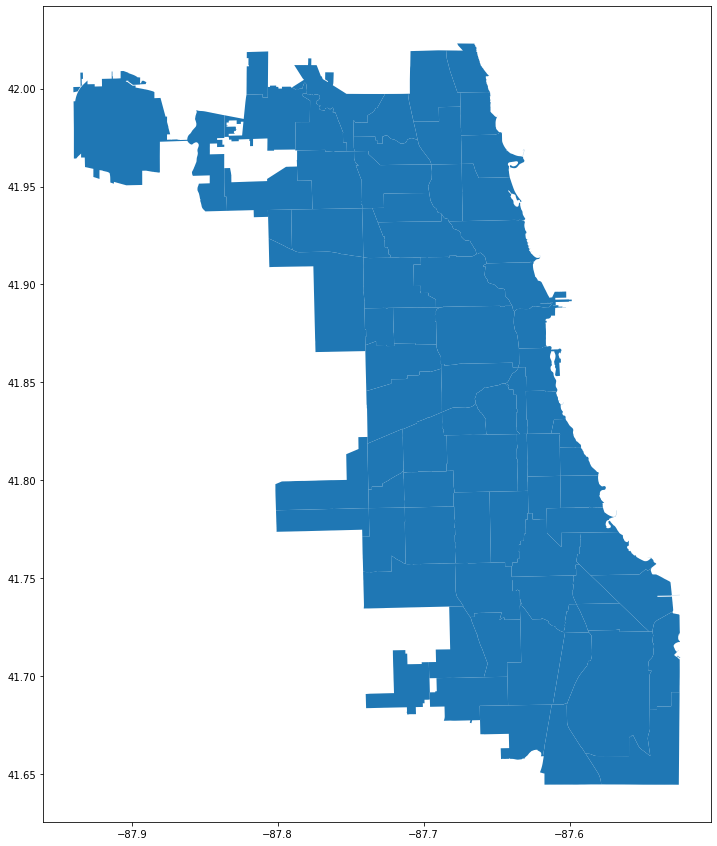

In [13]:
street_map = gpd.read_file('Data/geo_export_f6ee29e8-bda0-40d6-9887-d12c071d9bf7.shp')
fig,ax = plt.subplots(figsize = (15,15))
street_map.plot(ax=ax)

In [14]:
crs = {'init': 'epsg:4326'}
geo = [Point(xy) for xy in zip( df["LONGITUDE"], df["LATITUDE"])]
geo[:3]

In [15]:
geo_df = gpd.GeoDataFrame(df, crs=crs,  geometry=geo )
geo_df = geo_df[geo_df['LONGITUDE'] != 0.0]
geo_df

/opt/anaconda3/lib/python3.8/site-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,Unnamed: 0,CRASH_RECORD_ID,CRASH_DATE,POSTED_SPEED_LIMIT,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,ROADWAY_SURFACE_COND,ROAD_DEFECT,...,SEX,SAFETY_EQUIPMENT,AIRBAG_DEPLOYED,EJECTION,VEHICLE_DEFECT,VEHICLE_TYPE,VEHICLE_USE,MANEUVER,FIRST_CONTACT_POINT,geometry
0,0,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,2019-07-10,35,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,DRY,NO DEFECTS,...,M,USAGE UNKNOWN,NOT APPLICABLE,NONE,UNKNOWN,PASSENGER,PERSONAL,BACKING,REAR,POINT (-87.77329 41.91966)
1,1,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,2019-07-10,35,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,DRY,NO DEFECTS,...,M,USAGE UNKNOWN,NOT APPLICABLE,NONE,UNKNOWN,PASSENGER,PERSONAL,TURNING RIGHT,FRONT,POINT (-87.77329 41.91966)
2,2,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,2019-07-10,35,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,DRY,NO DEFECTS,...,M,USAGE UNKNOWN,NOT APPLICABLE,NONE,UNKNOWN,PASSENGER,PERSONAL,BACKING,REAR,POINT (-87.77329 41.91966)
3,3,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,2019-07-10,35,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,DRY,NO DEFECTS,...,M,USAGE UNKNOWN,NOT APPLICABLE,NONE,UNKNOWN,PASSENGER,PERSONAL,TURNING RIGHT,FRONT,POINT (-87.77329 41.91966)
4,4,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,2019-07-10,35,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,DRY,NO DEFECTS,...,M,USAGE UNKNOWN,NOT APPLICABLE,NONE,UNKNOWN,PASSENGER,PERSONAL,BACKING,REAR,POINT (-87.77329 41.91966)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558249,2528207,ffff27f5ef6d4465bf2e6da46c1d07ac6f017c6ca1f477...,2019-06-19,25,FUNCTIONING PROPERLY,RAIN,"DARKNESS, LIGHTED ROAD",TURNING,WET,NO DEFECTS,...,M,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,NONE,UNKNOWN,PICKUP,UNKNOWN/NA,TURNING RIGHT,REAR-LEFT,POINT (-87.70523 41.85817)
558250,2528208,ffff27f5ef6d4465bf2e6da46c1d07ac6f017c6ca1f477...,2019-06-19,25,FUNCTIONING PROPERLY,RAIN,"DARKNESS, LIGHTED ROAD",TURNING,WET,NO DEFECTS,...,M,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,NONE,UNKNOWN,UNKNOWN/NA,PERSONAL,TURNING LEFT,SIDE-RIGHT,POINT (-87.70523 41.85817)
558251,2528209,ffff27f5ef6d4465bf2e6da46c1d07ac6f017c6ca1f477...,2019-06-19,25,FUNCTIONING PROPERLY,RAIN,"DARKNESS, LIGHTED ROAD",TURNING,WET,NO DEFECTS,...,F,SAFETY BELT USED,DID NOT DEPLOY,NONE,UNKNOWN,PICKUP,UNKNOWN/NA,TURNING RIGHT,REAR-LEFT,POINT (-87.70523 41.85817)
558252,2528210,ffff27f5ef6d4465bf2e6da46c1d07ac6f017c6ca1f477...,2019-06-19,25,FUNCTIONING PROPERLY,RAIN,"DARKNESS, LIGHTED ROAD",TURNING,WET,NO DEFECTS,...,F,SAFETY BELT USED,DID NOT DEPLOY,NONE,UNKNOWN,UNKNOWN/NA,PERSONAL,TURNING LEFT,SIDE-RIGHT,POINT (-87.70523 41.85817)


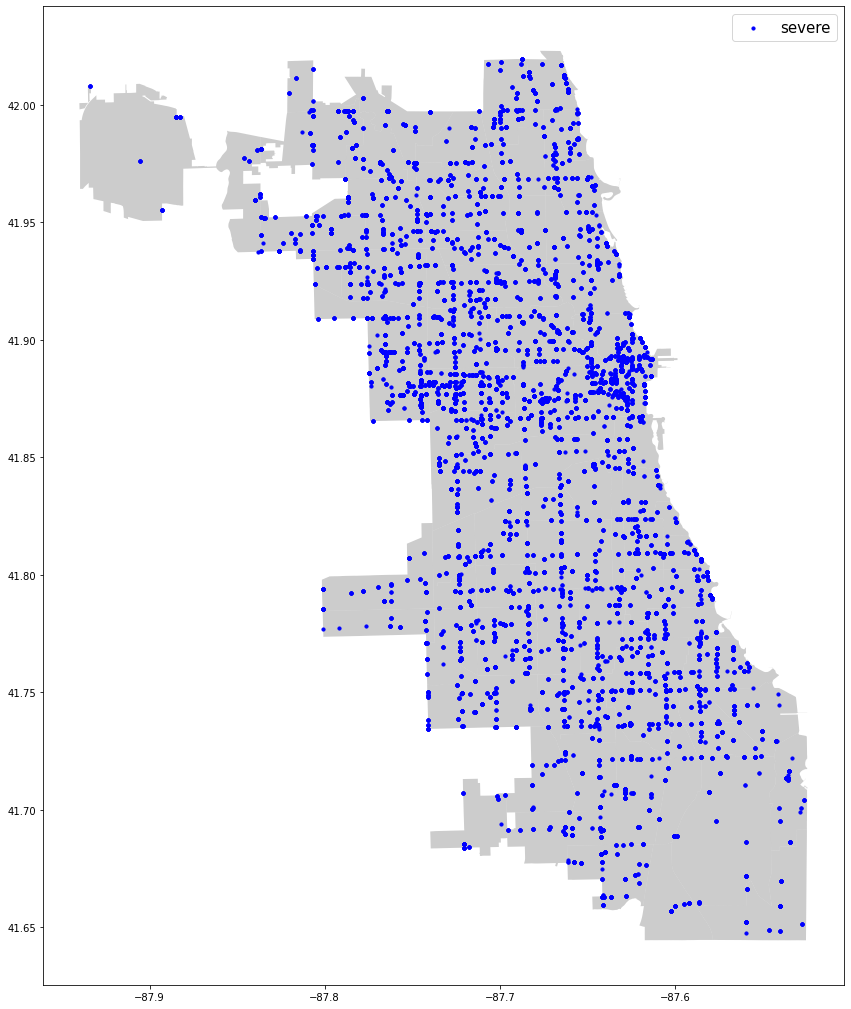

In [17]:
fig, ax = plt.subplots(figsize = (18,18))
street_map.plot(ax = ax, alpha = 0.4, color = 'grey')
geo_df[geo_df['MOST_SEVERE_INJURY'] == 'severe'].plot(ax = ax, 
                                                        markersize = 10, 
                                                        color = 'blue', 
                                                        marker = 'o', 
                                                        label = 'severe')


# geo_df[geo_df['MOST_SEVERE_INJURY'] == 'medium risk'].plot(ax = ax, 
#                                                         markersize = 10, 
#                                                         color = 'red', 
#                                                         marker = 'o', 
#                                                         label = 'medium')

plt.legend(prop = {'size':15})

In [18]:
step  = 0.01
to_bin = lambda x: np.floor(x / step ) * step 
geo_df["latbin"] = geo_df['LATITUDE'].map(to_bin)
geo_df["latbin"]
geo_df["lonbin"] = geo_df['LONGITUDE'].map(to_bin)
geo_df

,Unnamed: 0,CRASH_RECORD_ID,CRASH_DATE,POSTED_SPEED_LIMIT,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,ROADWAY_SURFACE_COND,ROAD_DEFECT,...,AIRBAG_DEPLOYED,EJECTION,VEHICLE_DEFECT,VEHICLE_TYPE,VEHICLE_USE,MANEUVER,FIRST_CONTACT_POINT,geometry,latbin,lonbin
0,0,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,2019-07-10,35,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,DRY,NO DEFECTS,...,NOT APPLICABLE,NONE,UNKNOWN,PASSENGER,PERSONAL,BACKING,REAR,POINT (-87.77329 41.91966),41.91,-87.78
1,1,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,2019-07-10,35,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,DRY,NO DEFECTS,...,NOT APPLICABLE,NONE,UNKNOWN,PASSENGER,PERSONAL,TURNING RIGHT,FRONT,POINT (-87.77329 41.91966),41.91,-87.78
2,2,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,2019-07-10,35,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,DRY,NO DEFECTS,...,NOT APPLICABLE,NONE,UNKNOWN,PASSENGER,PERSONAL,BACKING,REAR,POINT (-87.77329 41.91966),41.91,-87.78
3,3,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,2019-07-10,35,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,DRY,NO DEFECTS,...,NOT APPLICABLE,NONE,UNKNOWN,PASSENGER,PERSONAL,TURNING RIGHT,FRONT,POINT (-87.77329 41.91966),41.91,-87.78
4,4,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,2019-07-10,35,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,DRY,NO DEFECTS,...,NOT APPLICABLE,NONE,UNKNOWN,PASSENGER,PERSONAL,BACKING,REAR,POINT (-87.77329 41.91966),41.91,-87.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558249,2528207,ffff27f5ef6d4465bf2e6da46c1d07ac6f017c6ca1f477...,2019-06-19,25,FUNCTIONING PROPERLY,RAIN,"DARKNESS, LIGHTED ROAD",TURNING,WET,NO DEFECTS,...,DEPLOYMENT UNKNOWN,NONE,UNKNOWN,PICKUP,UNKNOWN/NA,TURNING RIGHT,REAR-LEFT,POINT (-87.70523 41.85817),41.85,-87.71
558250,2528208,ffff27f5ef6d4465bf2e6da46c1d07ac6f017c6ca1f477...,2019-06-19,25,FUNCTIONING PROPERLY,RAIN,"DARKNESS, LIGHTED ROAD",TURNING,WET,NO DEFECTS,...,DEPLOYMENT UNKNOWN,NONE,UNKNOWN,UNKNOWN/NA,PERSONAL,TURNING LEFT,SIDE-RIGHT,POINT (-87.70523 41.85817),41.85,-87.71
558251,2528209,ffff27f5ef6d4465bf2e6da46c1d07ac6f017c6ca1f477...,2019-06-19,25,FUNCTIONING PROPERLY,RAIN,"DARKNESS, LIGHTED ROAD",TURNING,WET,NO DEFECTS,...,DID NOT DEPLOY,NONE,UNKNOWN,PICKUP,UNKNOWN/NA,TURNING RIGHT,REAR-LEFT,POINT (-87.70523 41.85817),41.85,-87.71
558252,2528210,ffff27f5ef6d4465bf2e6da46c1d07ac6f017c6ca1f477...,2019-06-19,25,FUNCTIONING PROPERLY,RAIN,"DARKNESS, LIGHTED ROAD",TURNING,WET,NO DEFECTS,...,DID NOT DEPLOY,NONE,UNKNOWN,UNKNOWN/NA,PERSONAL,TURNING LEFT,SIDE-RIGHT,POINT (-87.70523 41.85817),41.85,-87.71


/opt/anaconda3/lib/python3.8/site-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
No handles with labels found to put in legend.


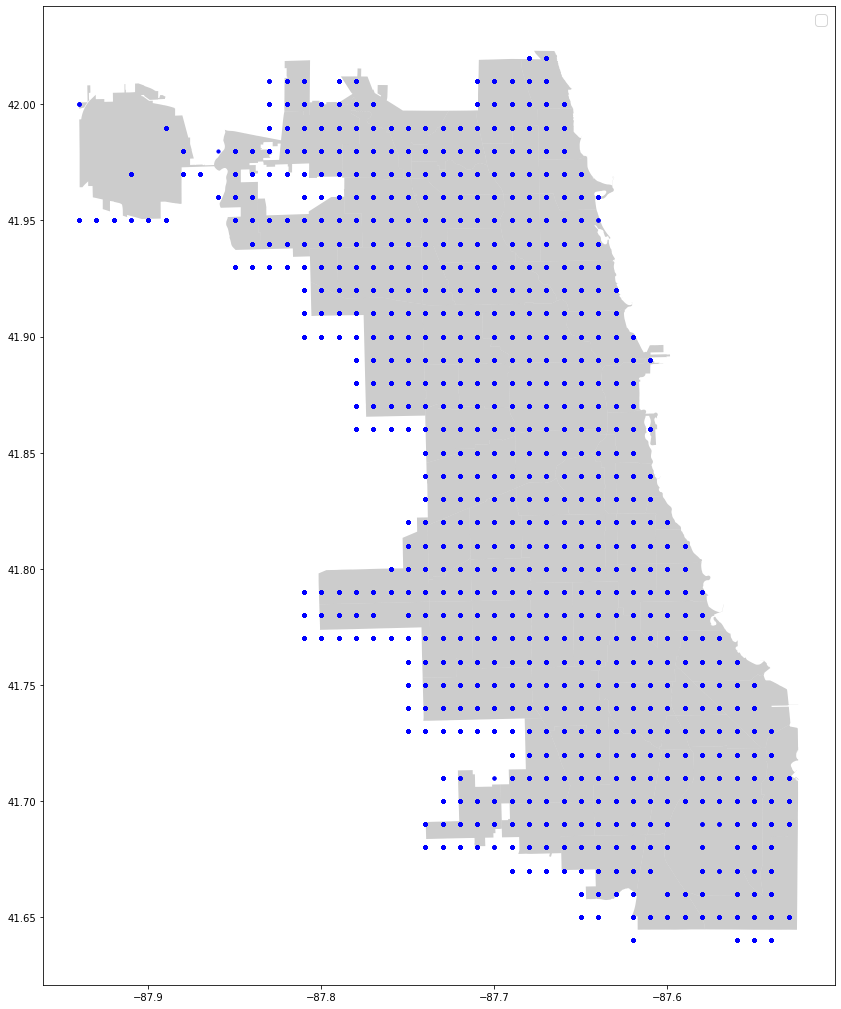

In [19]:
geo_bin = [Point(xy) for xy in zip( geo_df["lonbin"], geo_df["latbin"])]
geo_df_bin = gpd.GeoDataFrame(geo_df, crs=crs,  geometry=geo_bin )

fig, ax = plt.subplots(figsize = (18,18))
street_map.plot(ax = ax, alpha = 0.4, color = 'grey')
geo_df.plot(ax = ax, markersize = 10, color = 'blue', marker = 'o')


plt.legend(prop = {'size':15})

In [21]:
geo_bin = pd.DataFrame(geo_df[["lonbin","latbin"]].value_counts())
geo_bin.reset_index(inplace=True)
geo_bin['accident_count'] = geo_bin[0] 
geo_bin['accident_prob'] = 100*(geo_bin['accident_count']/geo_bin['accident_count'].sum())
print(geo_bin['accident_count'].quantile(.8) )     
print(geo_bin['accident_count'].quantile(.6) )     
print(geo_bin['accident_count'].quantile(.4) )     
print(geo_bin['accident_count'].quantile(.2) )

1259.0
838.0
484.0
170.0


In [22]:
def label_zones(accident_count):
    if accident_count > 1229.0:
        return 5
    if accident_count < 1229.0 and accident_count > 816.0:
        return 4
    if accident_count < 816.0 and accident_count > 466.0:
        return 3
    if accident_count < 466.0 and accident_count > 167.0:
        return 2
    if accident_count < 167.0:
        return 1

In [23]:
geo_bin['accident_risk'] = geo_bin['accident_count'].map(lambda x: label_zones(x))

In [24]:
df = geo_df.merge(geo_bin, how = 'left', on = ['lonbin','latbin'])
df.drop(df.columns[np.r_[0,34]], axis=1, inplace=True)

In [25]:
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 558216 entries, 0 to 558215
Data columns (total 36 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   CRASH_RECORD_ID          558216 non-null  object        
 1   CRASH_DATE               558216 non-null  datetime64[ns]
 2   POSTED_SPEED_LIMIT       558216 non-null  int64         
 3   DEVICE_CONDITION         558216 non-null  object        
 4   WEATHER_CONDITION        558216 non-null  object        
 5   LIGHTING_CONDITION       558216 non-null  object        
 6   FIRST_CRASH_TYPE         558216 non-null  object        
 7   ROADWAY_SURFACE_COND     558216 non-null  object        
 8   ROAD_DEFECT              558216 non-null  object        
 9   CRASH_TYPE               558216 non-null  object        
 10  DAMAGE                   558216 non-null  object        
 11  PRIM_CONTRIBUTORY_CAUSE  558216 non-null  object        
 12  SEC_CONT

In [27]:
geo_df['MOST_SEVERE_INJURY'].value_counts()

mild      483948
medium     59576
severe     14692
Name: MOST_SEVERE_INJURY, dtype: int64

In [29]:
mild_percentage = (483978/(483978+59584+14692))*100
print(mild_percentage)

86.69494531163234


In [30]:
medium_percentage = (59584/(483978+59584+14692))*100
print(medium_percentage)

10.67327775528702


In [31]:
severe_percentage = (14692/(483978+59584+14692))*100
print(severe_percentage)

2.6317769330806406


In [46]:
# df.dropna(subset=['MOST_SEVERE_INJURY'], inplace=True)

In [32]:
df.shape

(558216, 36)

# Split the data

In [49]:
X = df.drop(["MOST_SEVERE_INJURY","CRASH_RECORD_ID", "CRASH_DATE"], axis=1)
y = df['MOST_SEVERE_INJURY']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .3, random_state = 42)

In [50]:
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [51]:
X_train['LATITUDE'].fillna(df['LATITUDE'].mean(), inplace=True )
X_train['LONGITUDE'].fillna(df['LONGITUDE'].mean(), inplace=True )

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [52]:
X_train['SEX'].fillna('X', inplace=True)

X_train['SEX'] = X_train['SEX'].map({'M': 'M', 
                           'F': 'F',
                           'X': 'Unknown'})
X_train['SEX'].value_counts()

<ipython-input-52-6614c1745b58>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['SEX'] = X_train['SEX'].map({'M': 'M',


M          203352
F          150158
Unknown     37267
Name: SEX, dtype: int64

In [53]:
X_train['SAFETY_EQUIPMENT'].fillna('USAGE UNKNOWN', inplace=True)
X_train['AIRBAG_DEPLOYED'].fillna('DEPLOYMENT UNKNOWN', inplace=True)
X_train['EJECTION'].fillna('UNKNOWN', inplace=True)
X_train['VEHICLE_DEFECT'].fillna('UNKNOWN', inplace=True)
X_train['VEHICLE_TYPE'].fillna('UNKNOWN/NA', inplace=True)
X_train['VEHICLE_USE'].fillna('UNKNOWN/NA', inplace=True)
X_train['MANEUVER'].fillna('UNKNOWN/NA', inplace=True)
X_train['FIRST_CONTACT_POINT'].fillna('UNKNOWN', inplace=True)

In [54]:
X_train.isnull().sum()

Unnamed: 0                 0
POSTED_SPEED_LIMIT         0
DEVICE_CONDITION           0
WEATHER_CONDITION          0
LIGHTING_CONDITION         0
FIRST_CRASH_TYPE           0
ROADWAY_SURFACE_COND       0
ROAD_DEFECT                0
CRASH_TYPE                 0
DAMAGE                     0
PRIM_CONTRIBUTORY_CAUSE    0
SEC_CONTRIBUTORY_CAUSE     0
CRASH_HOUR                 0
CRASH_DAY_OF_WEEK          0
CRASH_MONTH                0
LATITUDE                   0
LONGITUDE                  0
PERSON_ID                  0
PERSON_TYPE                0
SEX                        0
SAFETY_EQUIPMENT           0
AIRBAG_DEPLOYED            0
EJECTION                   0
VEHICLE_DEFECT             0
VEHICLE_TYPE               0
VEHICLE_USE                0
MANEUVER                   0
FIRST_CONTACT_POINT        0
dtype: int64

# dummy_model

In [62]:
dummy_model = DummyClassifier(strategy="most_frequent")
dummy_model.fit(X_train, y_train)
dummy_model.predict(X_train)[:50]
cv_results = cross_val_score(dummy_model, X_train, y_train, cv=5)
cv_results

array([0.86690721, 0.86690721, 0.8669183 , 0.8669183 , 0.8669183 ])

# Logistic Model-baseline

In [67]:
X_train_baseline = X_train.select_dtypes(include=['int64','float64'])
X_test_baseline = X_test.select_dtypes(include=['int64','float64'])

model = LogisticRegression(multi_class='multinomial', solver='lbfgs',max_iter=10000000)
model.fit(X_train_baseline,y_train)
y_hat = model.predict(X_train_baseline)

acc = accuracy_score(y_train,y_hat)
acc

0.8669138664762768

In [69]:
precision_score(y_train, y_hat, average='macro')

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.2889712888254256

In [70]:
precision_score(y_train, y_hat, average='micro')

0.8669138664762768

In [71]:
precision_score(y_train, y_hat, average='weighted')

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.7515396518888477

In [89]:
recall_score(y_train, y_hat, average='macro')

0.3333333333333333

In [90]:
recall_score(y_train, y_hat, average='micro')

0.8669138664762768

In [91]:
recall_score(y_train, y_hat, average='weighted')

0.8669138664762768

In [36]:
confusion_matrix(y_train, y_hat)

array([[     0,  10264,      0],
       [     0, 338770,      0],
       [     0,  41743,      0]])

In [86]:
categoricals = ['POSTED_SPEED_LIMIT', 'DEVICE_CONDITION',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION']

train_dummies = X_train[categoricals]
#test_dummies = X_test[categoricals]

# Create OneHotEncoder object to create dummies
ohe = OneHotEncoder(handle_unknown='ignore')
# Transform the dataset into dummies matrix

enc = ohe.fit(train_dummies)
train_dummies_trans = enc.transform(train_dummies)
#test_dummies_trans = enc.transform(test_dummies)

# Dummies values in matrix form
train_data = train_dummies_trans.todense()
#test_data = test_dummies_trans.todense()

# New dummy column names
names = ohe.get_feature_names(categoricals)

# Make them into Dataframe
train_dummies_trans_df = pd.DataFrame(train_data, columns=names)
#test_dummies_trans_df = pd.DataFrame(test_data, columns=names)

In [ ]:
from sklearn import *
logreg_model_dummy = LogisticRegression(random_state=2021, penalty='none',max_iter=10000)
logreg_model_dummy.fit(train_dummies_trans_df, y_train)
y_hat_dummy = model.predict(train_dummies_trans_df)
y_hat_dummy
# acc = accuracy_score(y_train,train_dummies_trans_df)
# acc

# Decision Tree

In [81]:
tree_clf = DecisionTreeClassifier(max_depth=2) 

tree_clf.fit(train_dummies_trans_df, y_train)

y_pred_dt = tree_clf.predict(train_dummies_trans_df)
y_pred_dt

array(['low risk', 'low risk', 'low risk', ..., 'low risk', 'low risk',
       'low risk'], dtype=object)

In [82]:
acc = accuracy_score(y_train,y_pred_dt) * 100
print("Accuracy: {0}".format(acc))

Accuracy: 86.69138664762768


In [83]:
precision_score(y_train, y_pred_dt, average='macro')

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.2889712888254256

In [84]:
precision_score(y_train, y_pred_dt, average='micro')

0.8669138664762768

In [85]:
precision_score(y_train, y_pred_dt, average='weighted')

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.7515396518888477

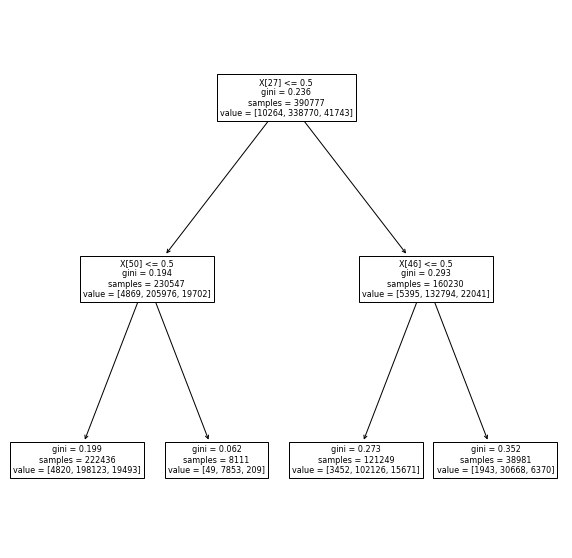

In [35]:
f,ax = plt.subplots(figsize=(10,10))
plot_tree(tree_clf, ax=ax);